In [1]:
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim

In [2]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self, train = True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = -3 * self.x + 1
        self.y = self.f + 0.1 * torch.rand(self.x.size())
        self.len = self.x.shape[0]
        if train:
            self.y[0] = 0
            self.y[50:55] = 20
        else:
            pass
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [3]:
train_data = Data()
val_data = Data(train = False)

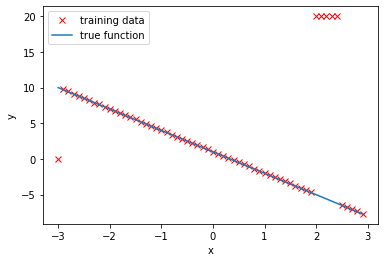

In [4]:
plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr', label = 'training data')
plt.plot(train_data.x.numpy(), train_data.f.numpy(), label = 'true function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [5]:
class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        y_hat = self.linear(x)
        return y_hat

In [6]:
criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

In [7]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
train_error = torch.zeros(len(learning_rates))
validation_error = torch.zeros(len(learning_rates))
models = []

In [8]:
def train_model_with_lr(iter, lr_list):
    for i, lr in enumerate(lr_list):
        model = linear_regression(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = lr)
        for epoch in range(iter):
            for x, y in trainloader:
                y_hat = model(x)
                loss = criterion(y_hat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        y_hat = model(train_data.x)
        train_loss = criterion(y_hat, train_data.y)
        train_error[i] = train_loss.item()
        y_hat = model(val_data.x)
        val_loss = criterion(y_hat, val_data.y)
        validation_error[i] = val_loss.item()
        models.append(model)
train_model_with_lr(10, learning_rates)

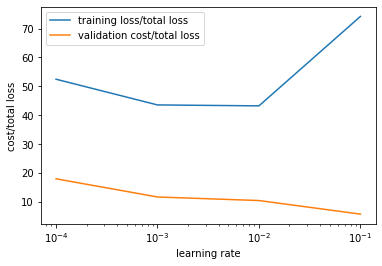

In [9]:
plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total loss')
plt.ylabel('cost/total loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

In [ ]:
for x, y in trainloader:
    tp